**Integrantes del equipo:**
* Ricardo Ariel Flores Peregrina
* Carlos Cabrera Castrejón

# Proyecto Final: *Título del proyecto*

**Descripción del proyecto**

Escribe aquí la descripción...

**Objetivos del proyecto**

* Objetivo 1
* Objetivo 2

Evaluation Metric
Accuracy, Confusion Matrix


**Descripción del conjunto de datos**

Escrbie aquí acerca del conjunto de datos: ¿Cómo se recolectó? ¿Qué significan los atributos? Variable a predecir... etc.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder # Pre-procesamiento
from sklearn.compose import make_column_transformer # Pre-procesamiento

from sklearn.model_selection import train_test_split # Dividir datos

from sklearn.neighbors import KNeighborsClassifier # Clasificadores
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # Hiper-parameter tuning

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay # Métricas de evaluación

# Librería que contiene stopwords en diferentes idiomas
from nltk.corpus import stopwords

# Librería que busca un determinado substring y lo reemplaza con otro
import string

from sklearn.linear_model import LinearRegression, Lasso, Ridge # <----- REGRESION
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error # <----- EVALUACION
from sklearn.decomposition import PCA # Reducción dimensionalidad
from sklearn.cluster import KMeans # Clustering
# Ignorar warnings
import warnings

---

**Pre-procesamiento**

In [2]:
# desarrollo de todo el proyecto
df = pd.read_csv('https://raw.githubusercontent.com/miryamelizabeth/datasets/main/Project%20ML%20datasets/adults_income_dataset.csv')

In [3]:
# dfBackup = df
# df = dfBackup

In [4]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [5]:
df.shape

(48842, 15)

In [6]:
# Checamos si existen valores nulos en nuestro dataset
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Class             0
dtype: int64

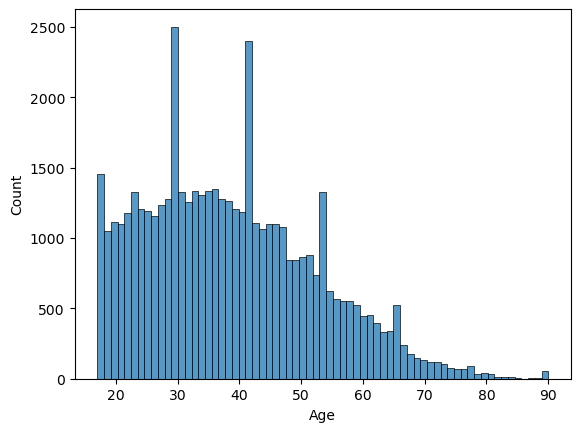

In [7]:
sns.histplot(x='Age', data=df)
plt.show()

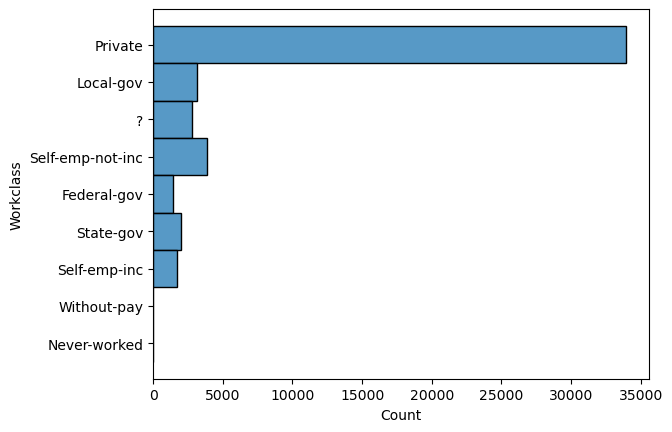

In [8]:
sns.histplot(y='Workclass', data=df)
plt.show()

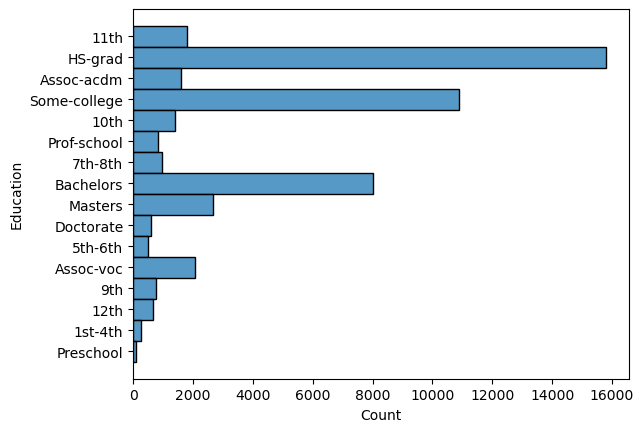

In [9]:
sns.histplot(y='Education', data=df)
plt.show()

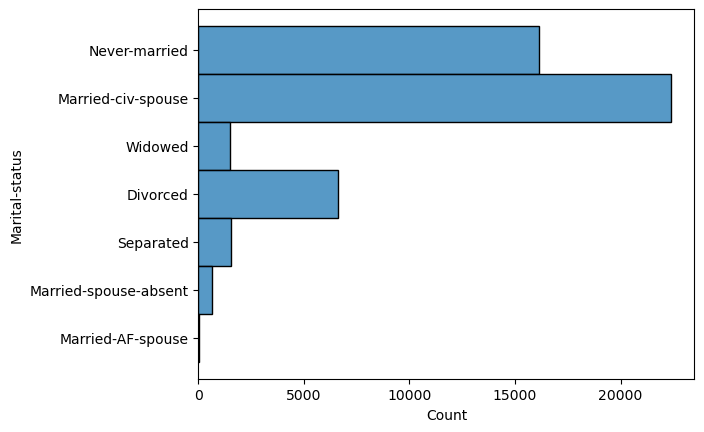

In [10]:
sns.histplot(y='Marital-status', data=df)
plt.show()

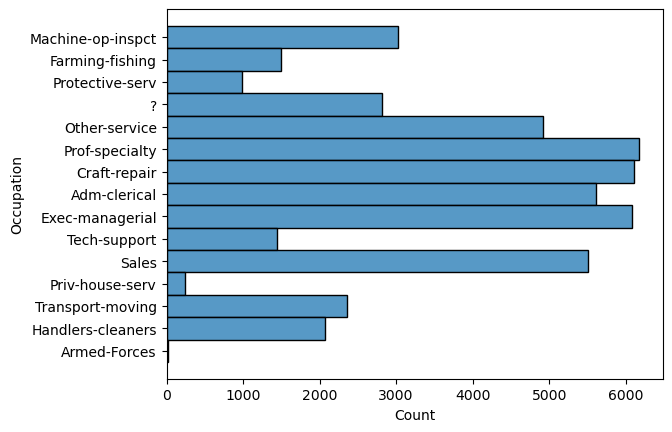

In [11]:
sns.histplot(y='Occupation', data=df)
plt.show()

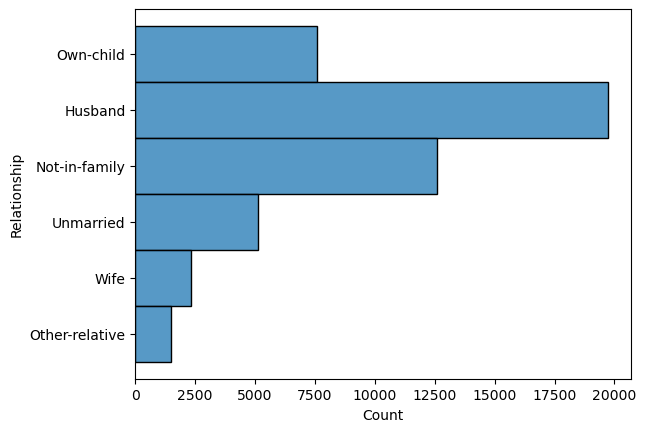

In [12]:
sns.histplot(y='Relationship', data=df)
plt.show()

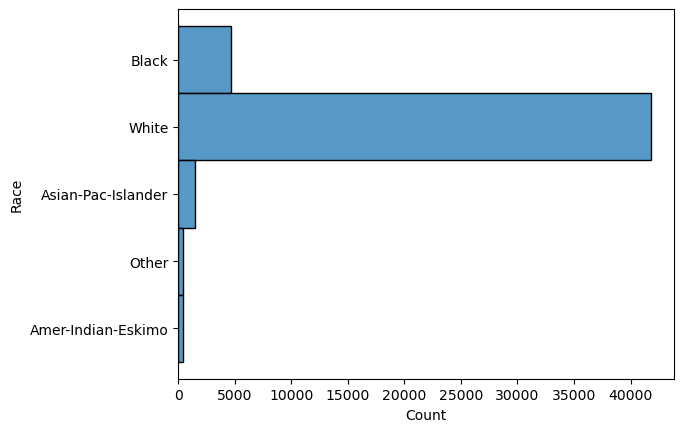

In [13]:
sns.histplot(y='Race', data=df)
plt.show()

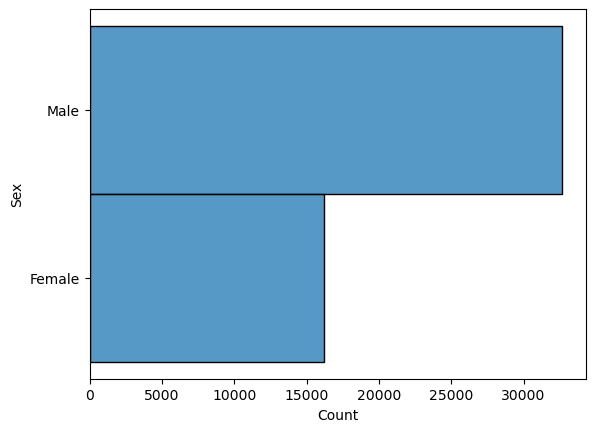

In [14]:
sns.histplot(y='Sex', data=df)
plt.show()

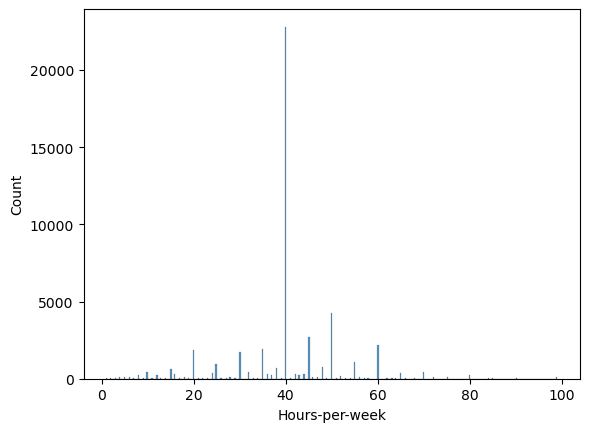

In [15]:
sns.histplot(x='Hours-per-week', data=df, )
plt.show()

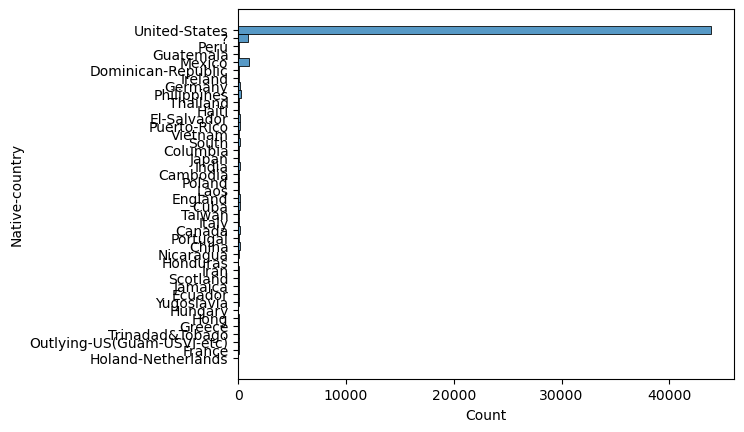

In [16]:
sns.histplot(y='Native-country', data=df)
plt.show()

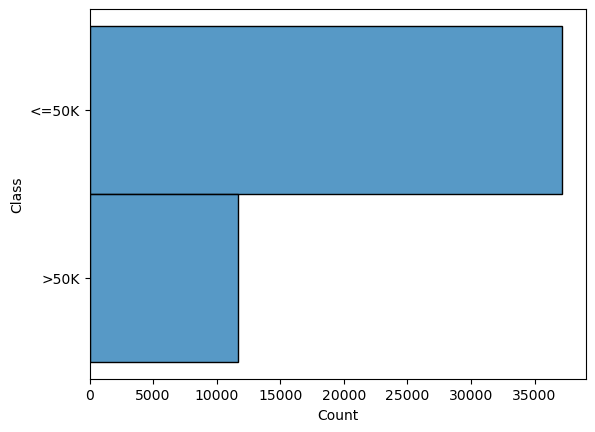

In [17]:
sns.histplot(y='Class', data=df)
plt.show()

In [18]:
# ages = pd.unique(df['Ages'])
workclass = pd.unique(df['Workclass'])
fnlwgt = pd.unique(df['Fnlwgt'])
education = pd.unique(df['Education'])
education_num = pd.unique(df['Education-num'])
marital_status = pd.unique(df['Marital-status'])
occupation = pd.unique(df['Occupation'])
relationship = pd.unique(df['Relationship'])
race = pd.unique(df['Race'])
sex = pd.unique(df['Sex'])
capital_gain = pd.unique(df['Capital-gain'])
capital_loss = pd.unique(df['Capital-loss'])
hours_per_week = pd.unique(df['Hours-per-week'])
native_country = pd.unique(df['Native-country'])
class_df = pd.unique(df['Class'])

In [19]:
print("Total de clases de trabajo: ", workclass)

Total de clases de trabajo:  ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [20]:
print("Clases de trabajo: ", fnlwgt)

Clases de trabajo:  [226802  89814 336951 ... 129912 255835 257302]


In [21]:
print("Grados de educacion: ", education)

Grados de educacion:  ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']


In [22]:
print("Total de ?: ", education_num)

Total de ?:  [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]


In [23]:
print("Estados civiles: ", marital_status)

Estados civiles:  ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']


In [24]:
print("Tipos de trabajo: ", occupation)

Tipos de trabajo:  ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']


In [25]:
print("Tipos de relaciones: ", relationship)

Tipos de relaciones:  ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']


In [26]:
print("Razas: ", race)

Razas:  ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']


In [27]:
print("Sexos: ", sex)

Sexos:  ['Male' 'Female']


In [28]:
print("Capital gain: ", capital_gain)

Capital gain:  [    0  7688  3103  6418  7298  3908 14084  5178 15024 99999  2597  2907
  4650  6497  1055  5013 27828  4934  4064  3674  2174 10605  3418   114
  2580  3411  4508  4386  8614 13550  6849  2463  3137  2885  2964  1471
 10566  2354  1424  1455  3325  4416 25236   594  2105  4787  2829   401
  4865  1264  1506 10520  3464  2653 20051  4101  1797  2407  3471  1086
  1848 14344  1151  2993  2290 15020  9386  2202  3818  2176  5455 11678
  7978  7262  6514 41310  3456  7430  2414  2062 34095  1831  6723  5060
 15831  2977  2346  3273  2329  9562  2635  4931  1731  6097   914  7896
  5556  1409  3781  3942  2538  3887 25124  7443  5721  1173  4687  6612
  6767  2961   991  2036  2936  2050  1111  2228 22040  3432  6360  2009
  1639 18481  2387]


In [29]:
print("Capital loss: ", capital_loss)

Capital loss:  [   0 1721 1876 2415 1887  625 1977 2057 1429 1590 1485 2051 2377 1672
 1628 1902 1602 1741 2444 1408 2001 2042 1740 1825 1848 1719 3004 2179
 1573 2205 1258 2339 1726 2258 1340 1504 2559 1668 1974 1980 1564 2547
 2002 1669 1617  323 3175 2472 2174 1579 2129 1510 1735 2282 1870 1411
 1911 1651 1092 1762 2457 2231 2238  653 1138 2246 2603 2392 1944 1380
 2465 1421 3770 1594  213 2149 2824 1844 2467 2163 1816 1648 2206 2352
  419 1539  880  810  974 4356 2489 1755 3683 2267 2080  155 3900 2201
 2754]


In [30]:
print("Horas de trabajo: ", hours_per_week)

Horas de trabajo:  [40 50 30 32 10 39 35 48 25 20 45 47  6 43 90 54 60 38 36 18 24 44 56 28
 16 41 22 55 14 33 37  8 12 70 15 75 52 84 42 80 68 99 65  5 17 72 53 29
 96 21 46  3  1 23 49 67 76  7  2 58 26 34  4 51 78 63 31 92 77 27 85 13
 19 98 62 66 57 11 86 59  9 64 73 61 88 79 89 74 69 87 97 94 82 91 81 95]


In [31]:
print("Paises: ", native_country)

Paises:  ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']


In [32]:
print("Class: ", class_df)

Class:  ['<=50K' '>50K']


In [33]:
(df=='?').sum()

Age                  0
Workclass         2799
Fnlwgt               0
Education            0
Education-num        0
Marital-status       0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native-country     857
Class                0
dtype: int64

In [34]:
# Podriamos utilizar clustering para asi saber que caracteristicas diferencian a aquellos que ganan < 50k y los que ganan > 50k

In [35]:

df_filter_workclass = df[df['Workclass'] == '?']
df_filter_occupation = df[df['Occupation'] == '?']
df_filter_country = df[df['Native-country'] == '?']

dfFiltered = pd.concat([df_filter_workclass, df_filter_occupation, df_filter_country], join="inner")

dfFilteredIndex = dfFiltered.index

# indexWorkclass = df_filter_workclass.index
# indexOccupation = df_filter_occupation.index
# indexCountry = df_filter_country.index

df.drop(dfFilteredIndex, inplace=True)


# df.drop(indexOccupation, inplace=True)
# df.drop(indexCountry, inplace=True)
# print(df_filter_workclass.head(10))

# (dfCopy=='?').sum()
df.shape


(45222, 15)

In [36]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [37]:
dfFinal = df.drop(['Fnlwgt', 'Capital-gain', 'Capital-loss', 'Education'], axis=1)
df = dfFinal

In [38]:
(df=='?').sum()

Age               0
Workclass         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours-per-week    0
Native-country    0
Class             0
dtype: int64

In [39]:
df.Class[df.Class == '>50K'] = 1
df.Class[df.Class == '<=50K'] = 0
df.head()

C:\Users\ricar\AppData\Local\Temp\ipykernel_20388\3090339285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Class[df.Class == '>50K'] = 1
C:\Users\ricar\AppData\Local\Temp\ipykernel_20388\3090339285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Class[df.Class == '<=50K'] = 0


,Age,Workclass,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Hours-per-week,Native-country,Class
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1
5,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,0


---

**Procesamiento de los datos categoricos**

In [40]:
# categoric_features = ['Workclass','Marital_status', 'Occupation',
#                     'Relationship','Race','Sex','Native_country','Class']
# #transformer = make_column_transformer( (LabelEncoder(), categoric_features))
# transformer = make_column_transformer( (OneHotEncoder(handle_unknown='ignore'), categoric_features))

---

**Reduccion de Dimensionalidad**

In [43]:
# X = df.drop(['Workclass','Education', 'Marital-status', 
#             'Occupation', 'Relationship', 'Race', 'Sex', 
#             'Native-country','Class'], axis=1)

X = df[['Class']]

In [47]:
# TODAS las columnas numéricas se guardan en una lista
# num_cols = df[['Age','Education-num','Hours-per-week']]
categoric_features = df[['Workclass','Marital-status', 'Occupation',
                    'Relationship','Race','Sex','Native-country']]

# Creamos el transformer, le indicamos el objeto y las columnas y ajustamos
transformer = make_column_transformer( (OneHotEncoder(), categoric_features) )
transformer.fit(X)

# Transforma los datos
X = transformer.transform(X)

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed

In [ ]:
distortions = []
K = range(1, 10)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel.fit(X)
    distortions.append(kmeansModel.inertia_) # obtenemos inercia

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# Clustering using KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

centers = kmeans.cluster_centers_
labels = kmeans.labels_

print(f'Centros:\n{centers}\n')
print(f'Labels: {labels[:20]}...')

In [ ]:
pca = PCA(n_components=0.80)
pca.fit(X)

# Transformar datos con las nuevas dimensiones
X_pca = pca.transform(X)
pca_centers = pca.transform(centers)

In [ ]:
df['cluster'] = labels
df.head()

In [ ]:
resultado = df['cluster'].value_counts(normalize='True').round(3) * 100
resultado.to_frame(name='elementos(%)').reset_index().rename(columns={'index': 'cluster'})

In [ ]:
sns.boxplot(x='cluster', y='Age', data=df)
plt.show()

In [ ]:
sns.scatterplot(x='Age', y='Hours-per-week',hue='Sex', data=df)
plt.show()

In [ ]:
# df_pca = pd.DataFrame(data=X, columns=['PC1', 'PC2'])
# df_pca['Class'] = y
# df_pca.head()

---

**Regrecion lineal**

In [ ]:
grafica1=sns.countplot(y='Workclass', hue='Class', data = df)

In [ ]:
grafica2=sns.countplot(y='Occupation', hue='Class', data = df)



---

**Conclusiones**

Escribe aquí tus conclusiones